# Q-Table Learning

In [2]:
import gym
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

ModuleNotFoundError: No module named 'gym'

## Load the environment

In [2]:
env = gym.make('FrozenLake-v0')

[2017-09-29 10:20:51,034] Making new env: FrozenLake-v0


## Implement Q-Table learning algorithm

In [36]:
# Initialize table with all zeros

n_obs = env.observation_space.n
n_actions = env.action_space.n

Q = np.zeros([n_obs, n_actions])

# Set learning parameters
lr = 0.8
y = 0.95
num_episodes = 2000

# create list to contain total rewards and steps per episode
rewards = []
js = []
for i in range(num_episodes):
    # Reset env and get first new observation
    s = env.reset()
    cum_reward = 0
    done = False
    j = 0
    
    # Q-Table learning algorithm
    while j < 99:
        j += 1
        # choose action greedily (with noise)
        a = np.argmax(Q[s,:] + np.random.randn(1, n_actions) / (1 + i))
        # Get new state and reward from env
        s1, r, done, _ = env.step(a)
        # Update Q-Table
        Q[s, a] = Q[s, a] + lr * (r + y * np.max(Q[s1, :]) - Q[s, a])
        cum_reward += r
        s = s1
        if done:
            break
    rewards.append(cum_reward)
    js.append(j)
        

In [26]:
print('Score over time: %f' % (float(sum(rewards)) / num_episodes))

Score over time: 0.637500


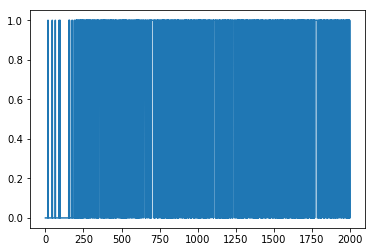

In [27]:
plt.plot(range(len(rewards)), rewards)
plt.show()

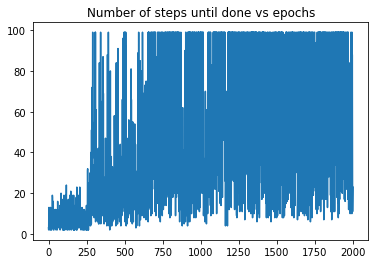

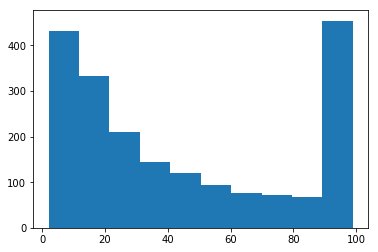

In [39]:
plt.plot(range(num_episodes), js)
plt.title('Number of steps until done vs epochs')
plt.show()
plt.hist(js)
plt.show()

# Q-Network Learning

In [1]:
import random
import tensorflow as tf